In [ ]:
import os
import numpy as np
from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Change the directory
os.chdir("/content/drive/MyDrive/ L5")

# Assign file names
mxBangalore = 'l5_Bangalore2011_raw.tif'
builtupBangalore = 'l5_Bangalore2011_builtup.tif'
mxHyderabad = 'l5_Hyderabad2011_raw.tif'

# Read the rasters as array
ds1, featuresBangalore = raster.read(mxBangalore, bands='all')
ds2, labelBangalore = raster.read(builtupBangalore, bands=1)
ds3, featuresHyderabad = raster.read(mxHyderabad, bands='all')

In [ ]:
# Print the size of the arrays
print("Bangalore Multispectral image shape: ", featuresBangalore.shape)
print("Bangalore Binary built-up image shape: ", labelBangalore.shape)
print("Hyderabad Multispectral image shape: ", featuresHyderabad.shape)

Bangalore Multispectral image shape:  (6, 2054, 2044)
Bangalore Binary built-up image shape:  (2054, 2044)
Hyderabad Multispectral image shape:  (6, 1318, 1056)


In [ ]:
# Clean the labelled data to replace NoData values by zero
labelBangalore = (labelBangalore == 1).astype(int)

# Reshape the array to single dimensional array
featuresBangalore = changeDimension(featuresBangalore)
labelBangalore = changeDimension (labelBangalore)
featuresHyderabad = changeDimension(featuresHyderabad)
nBands = featuresBangalore.shape[1]

print("Bangalore Multispectral image shape: ", featuresBangalore.shape)
print("Bangalore Binary built-up image shape: ", labelBangalore.shape)
print("Hyderabad Multispectral image shape: ", featuresHyderabad.shape)

The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.
Bangalore Multispectral image shape:  (4198376, 6)
Bangalore Binary built-up image shape:  (4198376,)
Hyderabad Multispectral image shape:  (1391808, 6)


In [ ]:
# Split testing and training datasets
xTrain, xTest, yTrain, yTest = train_test_split(featuresBangalore, labelBangalore, test_size=0.4, random_state=42)

print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

(2519025, 6)
(2519025,)
(1679351, 6)
(1679351,)


In [ ]:
# Normalise the data
xTrain = xTrain / 255.0
xTest = xTest / 255.0
featuresHyderabad = featuresHyderabad / 255.0

# Reshape the data
xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))
featuresHyderabad = featuresHyderabad.reshape((featuresHyderabad.shape[0], 1, featuresHyderabad.shape[1]))

# Print the shape of reshaped data
print(xTrain.shape, xTest.shape, featuresHyderabad.shape)

(2519025, 1, 6) (1679351, 1, 6) (1391808, 1, 6)


In [ ]:
# Define the parameters of the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, nBands)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

# Define the accuracy metrics and parameters
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Run the model
model.fit(xTrain, yTrain, epochs=2)

# Predict for test data
yTestPredicted = model.predict(xTest)
yTestPredicted = yTestPredicted[:,1]

# Calculate and display the error metrics
yTestPredicted = (yTestPredicted>0.5).astype(int)
cMatrix = confusion_matrix(yTest, yTestPredicted)
pScore = precision_score(yTest, yTestPredicted)
rScore = recall_score(yTest, yTestPredicted)

print("Confusion matrix: for 14 nodes\n", cMatrix)
print("\nP-Score: %.3f, R-Score: %.3f" % (pScore, rScore))

Epoch 1/2
78720/78720 [==============================] - 151s 2ms/step - loss: 0.1285 - accuracy: 0.9515
Epoch 2/2
52480/52480 [==============================] - 122s 2ms/step
Confusion matrix: for 14 nodes
 [[1447015   33861]
 [  34983  163492]]

P-Score: 0.828, R-Score: 0.824


In [ ]:
predicted = model.predict(featuresHyderabad)
predicted = predicted[:,1]

# Predict new data and export the probability raster
prediction = np.reshape(predicted, (ds3.RasterYSize, ds3.RasterXSize))
outFile = 'Hyderabad_2011_BuiltupNN_predicted.tif'
raster.export(prediction, ds3, filename=outFile, dtype='float')

43494/43494 [==============================] - 60s 1ms/step


In [ ]:
!pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.9 MB/s eta 0:00:00


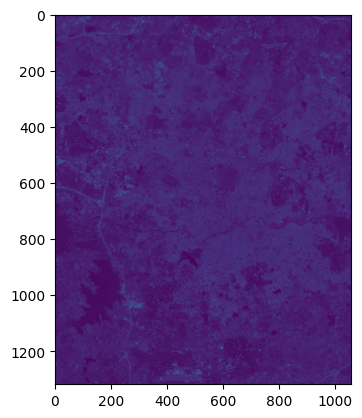

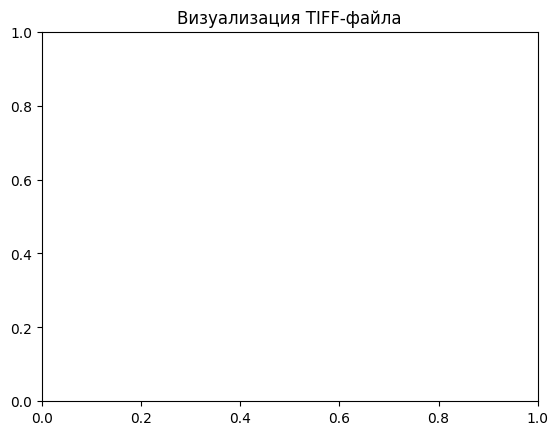

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Замените 'путь_к_вашему_файлу.tif' на фактический путь к вашему файлу TIFF
tif_path = '/content/drive/MyDrive/ L5/l5_Hyderabad2011_raw.tif'

# Открываем файл с помощью rasterio
dataset = rasterio.open(tif_path)

# Выбираем первый банд для визуализации
band_to_visualize = dataset.read(1)

# Визуализируем с использованием Matplotlib
show(band_to_visualize, cmap='viridis')  # Можно выбрать другую цветовую карту (cmap)
plt.title("Визуализация TIFF-файла")
plt.show()


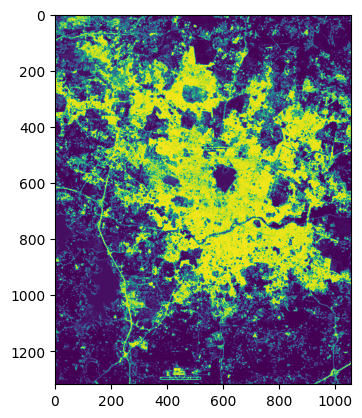

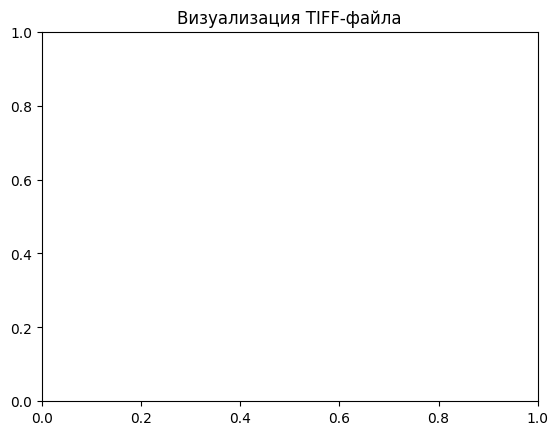

In [ ]:
tif_path2 = '/content/drive/MyDrive/ L5/Hyderabad_2011_BuiltupNN_predicted.tif'

# Открываем файл с помощью rasterio
dataset2 = rasterio.open(tif_path2)

# Выбираем первый банд для визуализации
band_to_visualize = dataset2.read(1)

# Визуализируем с использованием Matplotlib
show(band_to_visualize, cmap='viridis')  # Можно выбрать другую цветовую карту (cmap)
plt.title("Визуализация TIFF-файла")
plt.show()